In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import re,string,unicodedata
from bs4 import BeautifulSoup

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing.text import Tokenizer

from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [2]:
dataset = pd.read_csv('imdb-dataset.csv')
dataset.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


positive    25000
negative    25000
Name: sentiment, dtype: int64

<AxesSubplot:xlabel='sentiment', ylabel='count'>

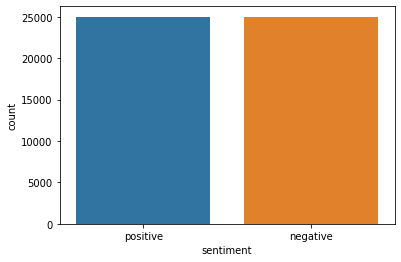

In [3]:
import warnings
warnings.simplefilter('ignore')

display(dataset['sentiment'].value_counts())
sns.countplot(dataset['sentiment'])

In [4]:
dataset.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [5]:
tokenizer = ToktokTokenizer()

stopword_list = stopwords.words('english')

In [6]:
i = 0
def preprocess_data(text, is_lower_case=False):
    global i
    ##remove noisy data
    soup = BeautifulSoup(text, 'html.parser')
    text = soup.get_text()
    text = re.sub('\[[^]]*\]', '', text)
    ##remove special charecter
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    
    ##Stemming text
    pstemmer = PorterStemmer()
    text= ' '.join([pstemmer.stem(word) for word in text.split()])
    ##remove stop words
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    i += 1
    if i%10000 == 0:
        print(i)
    return filtered_text


#### apply preprocessing

dataset['review']=dataset['review'].apply(preprocess_data)

10000
20000
30000
40000
50000


In [7]:
dataset['review']

0        one review ha mention watch 1 Oz episod youll ...
1        wonder littl product film techniqu veri unassu...
2        thought thi wa wonder way spend time hot summe...
3        basic famili littl boy jake think zombi hi clo...
4        petter mattei love time money visual stun film...
                               ...                        
49995    thought thi movi right good job wasnt creativ ...
49996    bad plot bad dialogu bad act idiot direct anno...
49997    cathol taught parochi elementari school nun ta...
49998    Im go disagre previou comment side maltin thi ...
49999    one expect star trek movi high art fan expect ...
Name: review, Length: 50000, dtype: object

In [8]:
le = LabelEncoder()
training_reviews, testing_reviews, training_labels, testing_labels  = train_test_split(dataset['review'].values,dataset['sentiment'].values,test_size = 0.2)
training_labels = le.fit_transform(training_labels)
testing_labels = le.fit_transform(testing_labels)

In [9]:
training_labels

array([1, 1, 1, ..., 1, 0, 0])

In [10]:
tokenizer = Tokenizer(num_words=10000,oov_token='<OOV>')
tokenizer.fit_on_texts(training_reviews)
word_index = tokenizer.word_index
training_sequence = tokenizer.texts_to_sequences(training_reviews)
testing_sequence = tokenizer.texts_to_sequences(testing_reviews)
train_pad_sequence = pad_sequences(training_sequence,maxlen = 200,truncating= 'post',padding = 'pre')
test_pad_sequence = pad_sequences(testing_sequence,maxlen = 200,truncating= 'post',padding = 'pre')
print('Total Unique Words : {}'.format(len(word_index)))

Total Unique Words : 155755


In [33]:
print(train_pad_sequence.shape)
for word in word_index:
    if len(word) > 20:
        print(word)

(40000, 200)
blahblahblahblahblahblahblahblahblahblahblahblahblahblahblahblahblahblah
writerproducerdirector
writersproducersdirector
httpblogmyspacecomlocoformovi
stereotypescountertyp
httpferdinandvongalitzienblogspotcom
wwwpetitiononlinecom19784444petitionhtml
differentactuallybullock
httpmoviemusereviewsblogspotcom
directorproducerswriterswhatev
gooddirtyrottenpigstealinggreatgreatgrandfath
httpwwwangelfirecomny5jbc33
teenagerstrappedinthewood
httpwwwpetitiononlinecomgh1215petitionhtml
hookerwithaheartofgold
unremarkablenaturaldaylight
symbiopsychotaxiplasm
httprateyourmusiccomfedor8
aluminumantiradiationalloy
interestattentionmoney
ahahahahahhahahahahahahahahahhahahahahahahah
broodingblasphemousobsess
uncontrolledbowelevacu
directorwritermaincharact
entertainingrecommend
draculafrankensteinmummyhorror
httppdmoviereviewblogspotcom
medicaremedicaidinsur
bloodbathcomeslasherhorror
httpwwwtazdept20060902a00131textdruck
httpwwwtazdept20050317a01511text
thickblackframedglasseswear
moreh

clownlikechainsawmassacreesquir
femininemasculineyingyang
dissatisfactionnonethel
casteffectsboredomexcitementand
dayshttpmcmusicnotesblogspotcom
shootfirstaskquestionslat
allactioncomedyheroicsand
chinesetaiwanesejapanes
worstcampestcheesiest
sciencefictionfantasi
strongresponsiblearrog
somethingtowatchwhennothingelseison
rollingaroundontheground
celluloidparticularli
prizefightersculptordressmak
addsubtractmultiplydivid
sharecroppingrandolph
robespierrejaruselski
swedishspeakingjewish
immigrantsparticularli
irishpakistanibronxcockneycajun
terrorismcounterterror
geniusturnedloonytoonmaniac
wonderingpointlessthen
shockthroughnameselect
strangerturnedhumansacrific
httpplazarakutencojpconfuocodiary200911290000and
desperatelyhungryforacceptanceinsecureand
angstingwithaninferioritycomplex
enginevibratorgroceriesetc
menstupidwomendoeveryth
loleralacartelort7890
gettingbacktruememorypart
nowconsideredtameandquaintborderlin
macgyverkickasssavingtheday
spiritcreaturelegendwhatev
halloweencostu

In [13]:
embedded_words = {}
with open('glove.6B.200d.txt', encoding='utf8') as file:
    for line in file:
        words, coeff = line.split(maxsplit=1)
        coeff = np.array(coeff.split(),dtype = float)
        embedded_words[words] = coeff

In [14]:
embedding_matrix = np.zeros((len(word_index) + 1,200))
for word, i in word_index.items():
    embedding_vector = embedded_words.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [15]:
len(word_index), embedding_matrix.shape

(155755, (155756, 200))

In [29]:
#0.1 , 0.5
model = tf.keras.Sequential([tf.keras.layers.Embedding(len(word_index) + 1, 200,weights=[embedding_matrix],input_length=200,
                            trainable=False),
                             tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
                             tf.keras.layers.Dropout(0.2),
                             tf.keras.layers.Dense(60,activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(l2=0.01)),
                             tf.keras.layers.Dropout(0.2),
                             tf.keras.layers.Dense(60,activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(l2=0.01)),
                             
                             tf.keras.layers.Dense(1,activation = tf.nn.sigmoid)])

In [30]:
model.compile(loss = tf.keras.losses.BinaryCrossentropy() , optimizer='Adam' , metrics = 'accuracy')
history = model.fit(
    train_pad_sequence,
    training_labels,
    batch_size=100,
    epochs = 15 ,
    validation_data=(test_pad_sequence,testing_labels))


Epoch 1/15
400/400 [==============================] - 188s 440ms/step - loss: 0.8144 - accuracy: 0.7100 - val_loss: 0.5369 - val_accuracy: 0.7601
Epoch 2/15
400/400 [==============================] - 177s 443ms/step - loss: 0.4918 - accuracy: 0.7892 - val_loss: 0.4378 - val_accuracy: 0.8142
Epoch 3/15
400/400 [==============================] - 160s 400ms/step - loss: 0.4317 - accuracy: 0.8197 - val_loss: 0.4779 - val_accuracy: 0.7724
Epoch 4/15
400/400 [==============================] - 160s 401ms/step - loss: 0.3972 - accuracy: 0.8364 - val_loss: 0.4098 - val_accuracy: 0.8233
Epoch 5/15
400/400 [==============================] - 161s 402ms/step - loss: 0.3610 - accuracy: 0.8538 - val_loss: 0.3658 - val_accuracy: 0.8445
Epoch 6/15
400/400 [==============================] - 161s 403ms/step - loss: 0.3454 - accuracy: 0.8640 - val_loss: 0.3550 - val_accuracy: 0.8548
Epoch 7/15
400/400 [==============================] - 161s 403ms/step - loss: 0.3291 - accuracy: 0.8717 - val_loss: 0.3817 -

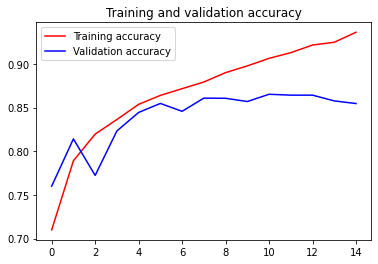

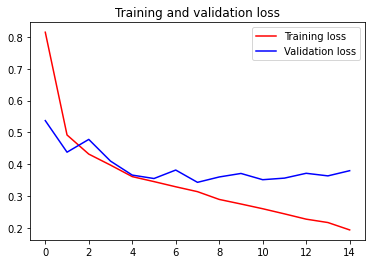

In [31]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)

plt.show()

In [32]:
print('Training Accuracy: {}'.format(max(acc)))
print('Validation Accuracy: {}'.format(max(val_acc)))

Training Accuracy: 0.9363250136375427
Validation Accuracy: 0.8652999997138977
